**Importing the Libraries**

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

**Importing the Dataset**

In [ ]:
data=pd.read_csv('heart.csv')

**Taking Care of Missing Values**

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Taking Care of Duplicate Values**

In [ ]:
data_dup = data.duplicated().any()

In [ ]:
data_dup

True

In [ ]:
data = data.drop_duplicates()

In [ ]:
data_dup = data.duplicated().any()

In [ ]:
data_dup

False

 **Data Processing**

In [ ]:
cate_val = []
cont_val = []
for column in data.columns:
  if data[column].nunique() <= 10:
    cate_val.append(column)
  else:
    cont_val.append(column)

In [ ]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

**Encoding Categorical Data**

In [ ]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
data['cp'].unique()

array([0, 1, 2, 3])

In [ ]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data, columns = cate_val, drop_first = True)

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


**Splitting The Dataset Into The Training Set And Test Set**

In [ ]:
X = data.drop('target', axis=1)

In [ ]:
y = data['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,False,True,False,False,...,False,True,False,True,False,False,False,False,False,True
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,False,False,False,True,...,True,True,False,False,True,False,False,True,False,False
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1.391408,-0.029032,-0.287311,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
123,1.171205,0,0.478910,3.299932,0.324963,-0.209608,False,True,False,True,...,False,False,True,True,False,False,False,False,True,False
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,False,False,False,False,...,True,False,True,True,False,False,False,False,False,True
274,1.281911,1,1.619532,-0.358057,-0.505981,1.084022,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


**Linear ML Algorithms**

**Logistic Regression**

In [ ]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [ ]:
def calculate_metrics(true_positive, false_positive, false_negative, true_negative):
    # Precision
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0

    # Recall (Sensitivity)
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

    # Specificity
    specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0

    # F1 Score
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    # False Positive Rate
    false_positive_rate = false_positive / (false_positive + true_negative) if (false_positive + true_negative) > 0 else 0

    # False Negative Rate
    false_negative_rate = false_negative / (false_negative + true_positive) if (false_negative + true_positive) > 0 else 0

    return precision, recall, specificity, f1_score, false_positive_rate, false_negative_rate


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred1)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred1).ravel()
# Calculate metrics
precision, recall, specificity, f1_score, false_positive_rate, false_negative_rate = calculate_metrics(tp, fp, fn, tn)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

Accuracy: 0.7868852459016393
Precision: 0.75
Recall: 0.8275862068965517
Specificity: 0.75
F1 Score: 0.7868852459016394
False Positive Rate: 0.25
False Negative Rate: 0.1724137931034483


**SVC**

In [ ]:
from sklearn import svm

In [ ]:
svm = svm.SVC()

In [ ]:
svm.fit(X_train, y_train)

SVC()

In [ ]:
y_pred2 = svm.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test, y_pred2)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred2).ravel()
# Calculate metrics
precision, recall, specificity, f1_score, false_positive_rate, false_negative_rate = calculate_metrics(tp, fp, fn, tn)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

Accuracy: 0.8032786885245902
Precision: 0.7575757575757576
Recall: 0.8620689655172413
Specificity: 0.75
F1 Score: 0.8064516129032258
False Positive Rate: 0.25
False Negative Rate: 0.13793103448275862


**KNeighbors Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred3 = knn.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test, y_pred3)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred3).ravel()
# Calculate metrics
precision, recall, specificity, f1_score, false_positive_rate, false_negative_rate = calculate_metrics(tp, fp, fn, tn)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

Accuracy: 0.7377049180327869
Precision: 0.6756756756756757
Recall: 0.8620689655172413
Specificity: 0.625
F1 Score: 0.7575757575757576
False Positive Rate: 0.375
False Negative Rate: 0.13793103448275862


In [ ]:
score = []
for k in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  score.append(accuracy_score(y_test, y_pred))


In [ ]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Calculate metrics
precision, recall, specificity, f1_score, false_positive_rate, false_negative_rate = calculate_metrics(tp, fp, fn, tn)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

Accuracy: 0.8032786885245902
Precision: 0.8148148148148148
Recall: 0.7586206896551724
Specificity: 0.84375
F1 Score: 0.7857142857142857
False Positive Rate: 0.15625
False Negative Rate: 0.2413793103448276


**Non-Linear ML Algorithms**

In [ ]:
data = pd.read_csv('heart.csv')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(302, 14)

In [ ]:
X = data.drop('target', axis=1)
y=data['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4 = dt.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_test, y_pred4)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred4).ravel()
# Calculate metrics
precision, recall, specificity, f1_score, false_positive_rate, false_negative_rate = calculate_metrics(tp, fp, fn, tn)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

Accuracy: 0.7213114754098361
Precision: 0.7307692307692307
Recall: 0.6551724137931034
Specificity: 0.78125
F1 Score: 0.6909090909090909
False Positive Rate: 0.21875
False Negative Rate: 0.3448275862068966


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred5 = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred5)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred5).ravel()
# Calculate metrics
precision, recall, specificity, f1_score, false_positive_rate, false_negative_rate = calculate_metrics(tp, fp, fn, tn)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

Accuracy: 0.8360655737704918
Precision: 0.7878787878787878
Recall: 0.896551724137931
Specificity: 0.78125
F1 Score: 0.8387096774193549
False Positive Rate: 0.21875
False Negative Rate: 0.10344827586206896


**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred6 = gbc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred6)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred6).ravel()
# Calculate metrics
precision, recall, specificity, f1_score, false_positive_rate, false_negative_rate = calculate_metrics(tp, fp, fn, tn)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

Accuracy: 0.8032786885245902
Precision: 0.7575757575757576
Recall: 0.8620689655172413
Specificity: 0.75
F1 Score: 0.8064516129032258
False Positive Rate: 0.25
False Negative Rate: 0.13793103448275862


**Create the DataFrame**

In [ ]:
conf_matrices = []
for y_pred in [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6]:
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    conf_matrices.append((tn, fp, fn, tp))

# Calculate metrics for each model
metrics = []
for cm in conf_matrices:
    precision, recall, specificity, f1_score, false_positive_rate, false_negative_rate = calculate_metrics(*cm)
    metrics.append((precision, recall, specificity, f1_score, false_positive_rate, false_negative_rate))

# Create the DataFrame
final_data = pd.DataFrame({'Models': ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB'],
                           'ACC': [accuracy_score(y_test, y_pred1),
                                   accuracy_score(y_test, y_pred2),
                                   accuracy_score(y_test, y_pred3),
                                   accuracy_score(y_test, y_pred4),
                                   accuracy_score(y_test, y_pred5),
                                   accuracy_score(y_test, y_pred6)],
                           'Precision': [m[0] for m in metrics],
                           'Recall': [m[1] for m in metrics],
                           'Specificity': [m[2] for m in metrics],
                           'F1 Score': [m[3] for m in metrics],
                           'False Positive Rate': [m[4] for m in metrics],
                           'False Negative Rate': [m[5] for m in metrics]})

final_data

,Models,ACC,Precision,Recall,Specificity,F1 Score,False Positive Rate,False Negative Rate
0,LR,0.786885,0.75000,0.827586,0.750000,0.786885,0.250000,0.172414
1,SVM,0.803279,0.75000,0.857143,0.757576,0.800000,0.242424,0.142857
2,KNN,0.737705,0.62500,0.833333,0.675676,0.714286,0.324324,0.166667
3,DT,0.721311,0.78125,0.714286,0.730769,0.746269,0.269231,0.285714
4,RF,0.836066,0.78125,0.892857,0.787879,0.833333,0.212121,0.107143
5,GB,0.803279,0.75000,0.857143,0.757576,0.800000,0.242424,0.142857


** Graphical Analysis**

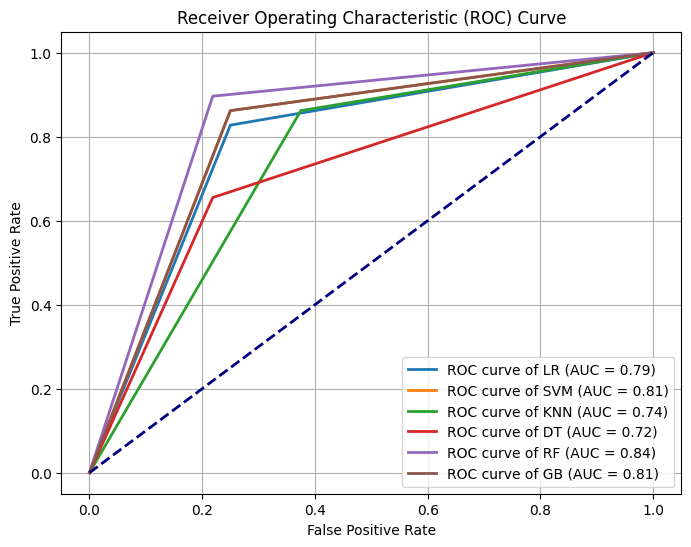

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have predictions for each algorithm stored in y_pred1, y_pred2, ..., y_pred6

plt.figure(figsize=(8, 6))
algo=["LR","SVM", "KNN", "DT", "RF", "GB"]
# Plot ROC curve for each algorithm
for i, y_pred in enumerate([y_pred1, y_pred2, y_pred3, y_pred4, y_pred5, y_pred6], 1):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve of {} (AUC = {:.2f})'.format(algo[i-1], roc_auc))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
import seaborn as sns

<ipython-input-69-f013fedc3fc1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_data['Models'], y=final_data['ACC'], legend=False, color = 'blue' , palette = 'hls')


<Axes: xlabel='Models', ylabel='ACC'>

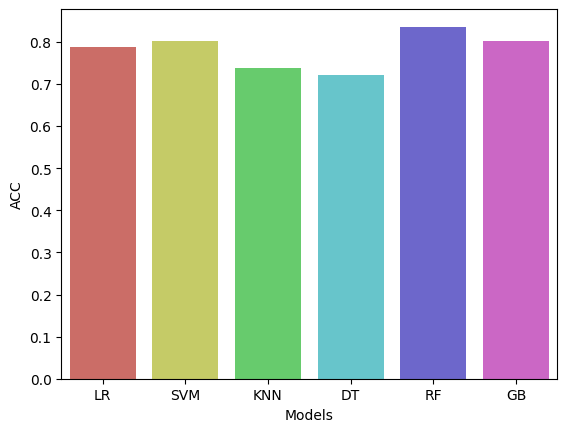

In [ ]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'], legend=False, color = 'blue' , palette = 'hls')


**Prediction on New Data**

In [ ]:
X = data.drop('target', axis=1)
y=data['target']

In [ ]:
X.shape

(302, 13)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X, y)

RandomForestClassifier()

**Prediction on New Data**

In [ ]:
import pandas as pd

In [ ]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3
    }, index=[0])

In [ ]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [ ]:
p = rf.predict(new_data)
if p[0]==0:
  print("No Disease")
else:
  print("Disease")

No Disease


**Save Model Usign Joblib**

In [ ]:
import joblib

In [ ]:
joblib.dump(rf, 'model_joblib_heart')

['model_joblib_heart']

In [ ]:
model = joblib.load('model_joblib_heart')

In [ ]:
model.predict(new_data)

array([0])

**Save Model Usign Pickle**

In [ ]:
import pickle
filename = 'heart_disease_model.sav'
pickle.dump(rf, open(filename, 'wb'))
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))
loaded_model.predict(new_data)

array([0])

**Creating GUI**

In [ ]:
# def show_entry_fields():
#     p1=int(e1.get())
#     p2=int(e2.get())
#     p3=int(e3.get())
#     p4=int(e4.get())
#     p5=int(e5.get())
#     p6=int(e6.get())
#     p7=int(e7.get())
#     p8=int(e8.get())
#     p9=int(e9.get())
#     p10=float(e10.get())
#     p11=int(e11.get())
#     p12=int(e12.get())
#     p13=int(e13.get())
#     model = joblib.load('model_joblib_heart')
#     result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])

#     if result == 0:
#         Label(master, text="No Heart Disease").grid(row=31)
#     else:
#         Label(master, text="Possibility of Heart Disease").grid(row=31)

# master = Tk()

# master.title("Heart Disease Prediction System")


# label = Label(master, text = "Heart Disease Prediction System"
#                           , bg = "black", fg = "white"). \
#                                grid(row=0,columnspan=2)


# Label(master, text="Enter Your Age").grid(row=1)
# Label(master, text="Male Or Female [1/0]").grid(row=2)
# Label(master, text="Enter Value of CP").grid(row=3)
# Label(master, text="Enter Value of trestbps").grid(row=4)
# Label(master, text="Enter Value of chol").grid(row=5)
# Label(master, text="Enter Value of fbs").grid(row=6)
# Label(master, text="Enter Value of restecg").grid(row=7)
# Label(master, text="Enter Value of thalach").grid(row=8)
# Label(master, text="Enter Value of exang").grid(row=9)
# Label(master, text="Enter Value of oldpeak").grid(row=10)
# Label(master, text="Enter Value of slope").grid(row=11)
# Label(master, text="Enter Value of ca").grid(row=12)
# Label(master, text="Enter Value of thal").grid(row=13)

# e1 = Entry(master)
# e2 = Entry(master)
# e3 = Entry(master)
# e4 = Entry(master)
# e5 = Entry(master)
# e6 = Entry(master)
# e7 = Entry(master)
# e8 = Entry(master)
# e9 = Entry(master)
# e10 = Entry(master)
# e11 = Entry(master)
# e12 = Entry(master)
# e13 = Entry(master)

# e1.grid(row=1, column=1)
# e2.grid(row=2, column=1)
# e3.grid(row=3, column=1)
# e4.grid(row=4, column=1)
# e5.grid(row=5, column=1)
# e6.grid(row=6, column=1)
# e7.grid(row=7, column=1)
# e8.grid(row=8, column=1)
# e9.grid(row=9, column=1)
# e10.grid(row=10, column=1)
# e11.grid(row=11, column=1)
# e12.grid(row=12, column=1)
# e13.grid(row=13, column=1)

# Button(master, text='Predict', command=show_entry_fields).grid()

# mainloop()

In [ ]:
# !pip install ipywidgets
from ipywidgets import interact, widgets, Layout
from IPython.display import display
import pandas as pd

def show_entry_fields(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    # Convert inputs to appropriate types
    p1 = int(age)
    p2 = int(sex)
    p3 = int(cp)
    p4 = int(trestbps)
    p5 = int(chol)
    p6 = int(fbs)
    p7 = int(restecg)
    p8 = int(thalach)
    p9 = int(exang)
    p10 = float(oldpeak)
    p11 = int(slope)
    p12 = int(ca)
    p13 = int(thal)

    # Create DataFrame with feature names
    X_test = pd.DataFrame({
        'age': [p1],
        'sex': [p2],
        'cp': [p3],
        'trestbps': [p4],
        'chol': [p5],
        'fbs': [p6],
        'restecg': [p7],
        'thalach': [p8],
        'exang': [p9],
        'oldpeak': [p10],
        'slope': [p11],
        'ca': [p12],
        'thal': [p13]
    })

    # Load the model
    model = joblib.load('model_joblib_heart')

    # Make prediction
    result = model.predict(X_test)

    # Display result
    if result == 0:
        print("No Heart Disease")
    else:
        print("Possibility of Heart Disease")

# Create input widgets
age = widgets.IntSlider(description="Age:", layout=Layout(width='50%'))
sex = widgets.Dropdown(options=[('Male', 1), ('Female', 0)], description="Gender:")
cp = widgets.IntSlider(description="CP:")
trestbps = widgets.IntSlider(description="Resting BP:")
chol = widgets.IntSlider(description="Cholesterol:")
fbs = widgets.IntSlider(description="Fasting BS:")
restecg = widgets.IntSlider(description="Rest ECG:")
thalach = widgets.IntSlider(description="Thalach:")
exang = widgets.IntSlider(description="Exang:")
oldpeak = widgets.FloatSlider(description="Oldpeak:")
slope = widgets.IntSlider(description="Slope:")
ca = widgets.IntSlider(description="CA:")
thal = widgets.IntSlider(description="Thal:")

# Create function to update prediction
def update_prediction(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    show_entry_fields(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)

# Display widgets and result
# display(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)
interact(update_prediction, age=age, sex=sex, cp=cp, trestbps=trestbps, chol=chol, fbs=fbs, restecg=restecg, thalach=thalach, exang=exang, oldpeak=oldpeak, slope=slope, ca=ca, thal=thal);


interactive(children=(IntSlider(value=0, description='Age:', layout=Layout(width='50%')), Dropdown(description…